In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm


In [6]:
import os
print(os.getcwd())

c:\Users\zohal\Desktop\New folder\Scicomp2


In [9]:
def generate_gaussian_samples(cov_matrix, num_samples):
    """
    Generate samples from a multivariate Gaussian distribution.
    
    Parameters:
        cov_matrix (np.ndarray): Covariance matrix for the distribution.
        num_samples (int): Number of samples to generate.
        
    Returns:
        samples (np.ndarray): Generated samples.
    """
    mean = np.zeros(cov_matrix.shape[0])
    # Generate samples from multivariate Gaussian
    L = np.linalg.cholesky(cov_matrix)  # Cholesky decomposition
    samples = np.dot(np.random.randn(num_samples, cov_matrix.shape[0]), L.T)
    return samples

def create_covariance_matrix(size):
    """
    Create a sample covariance matrix for the Gaussian distribution.
    
    Parameters:
        size (int): Size of the covariance matrix (number of dimensions).
        
    Returns:
        cov_matrix (np.ndarray): Generated covariance matrix.
    """
    A = np.random.randn(size, size)
    cov_matrix = np.dot(A, A.T)  # Ensure the matrix is positive semi-definite
    return cov_matrix


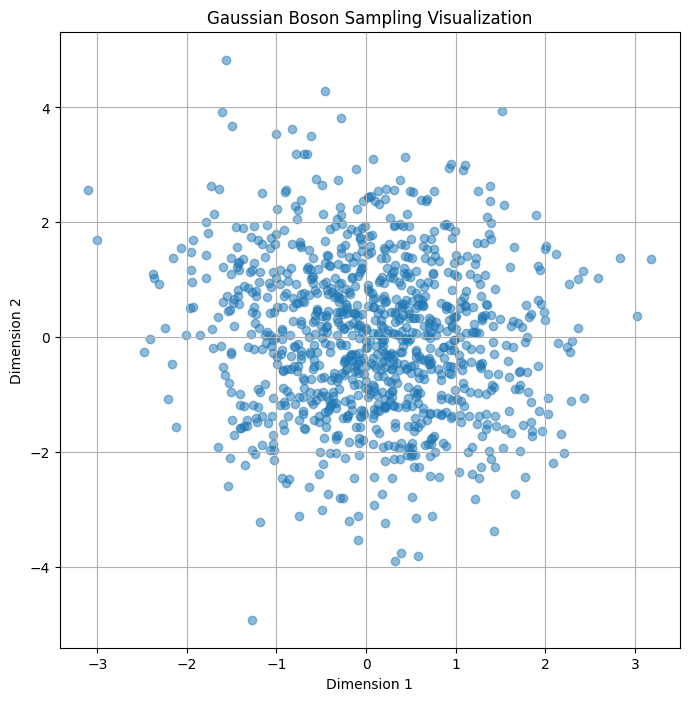

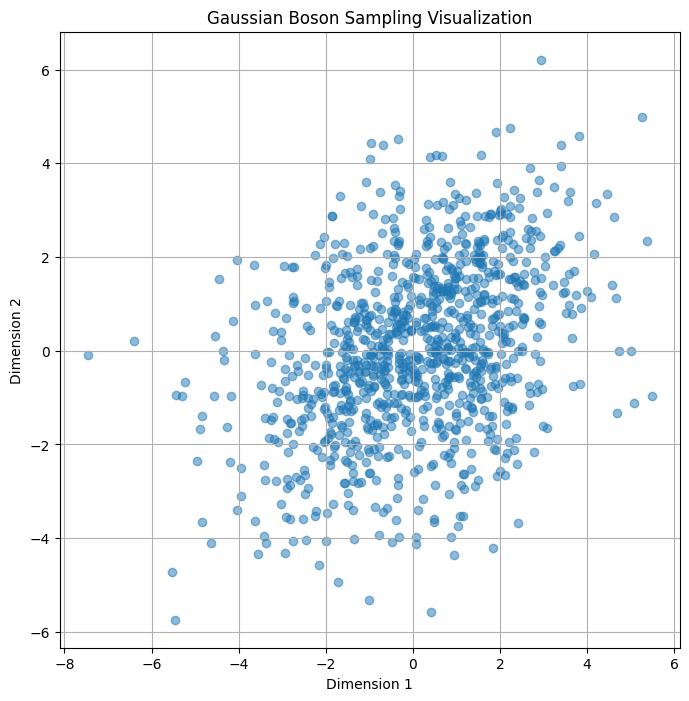

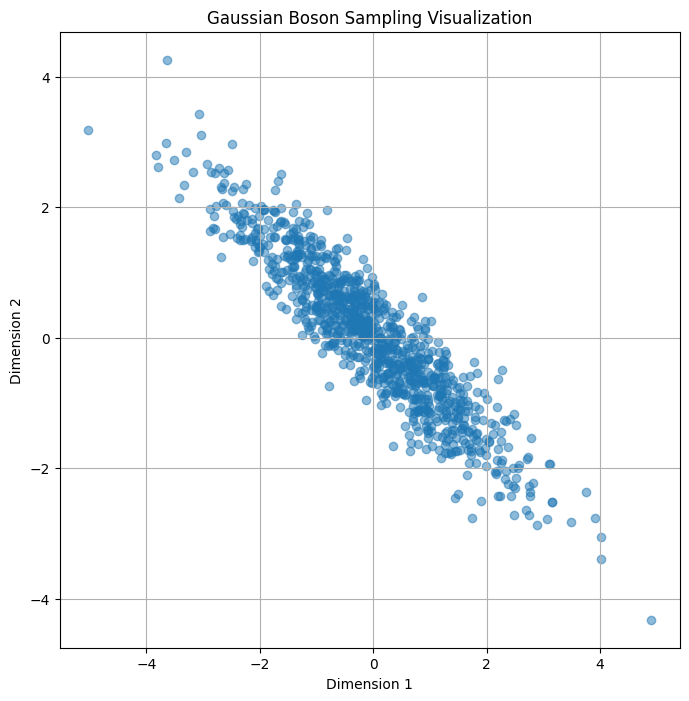

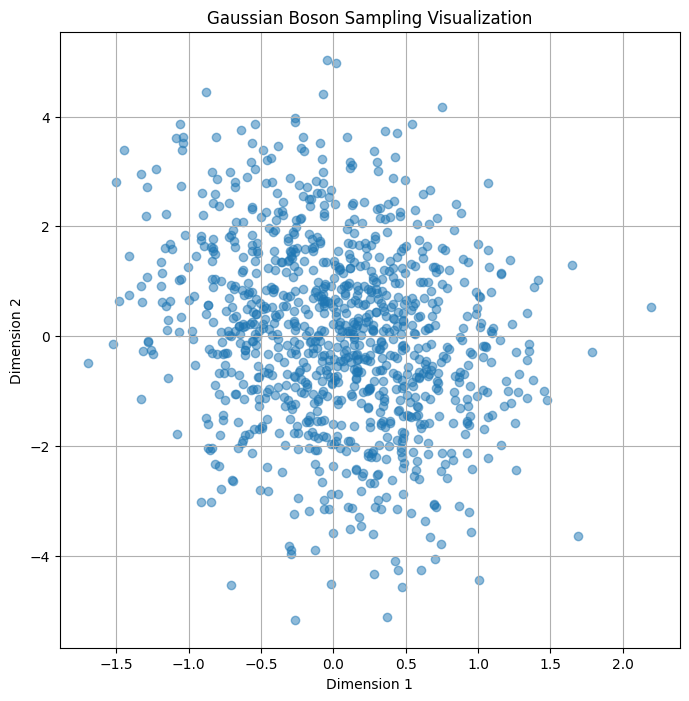

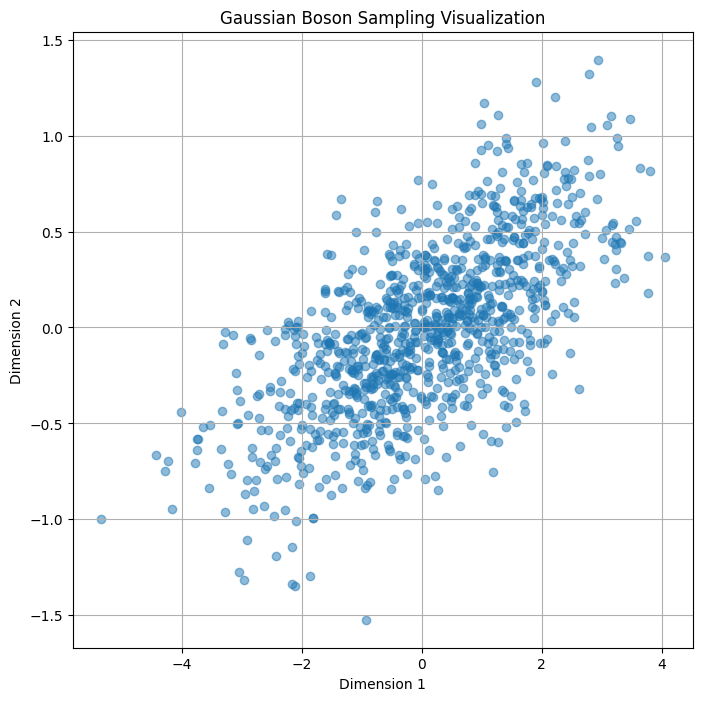

In [10]:
def visualize_samples(samples):
    """
    Visualize samples using a scatter plot.
    
    Parameters:
        samples (np.ndarray): Samples to plot.
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Gaussian Boson Sampling Visualization')
    plt.grid(True)
    plt.show()

# Parameters
num_samples = 1000
num_states = 5

# Generate and visualize samples for 5 different states
for i in range(num_states):
    cov_matrix = create_covariance_matrix(2)  # 2D covariance matrix for visualization
    samples = generate_gaussian_samples(cov_matrix, num_samples)
    visualize_samples(samples)


In [14]:
import numpy as np

def generate_coherent_states(alpha, size):
    return np.array([alpha * np.exp(1j * np.pi * np.random.rand()) for _ in range(size)])

def homodyne_detection(states):
    return np.real(states) + np.random.normal(scale=0.1, size=states.shape)

def feedback_adjustment(measurements, threshold=0.5):
    avg_measurement = np.mean(measurements)
    return threshold + (avg_measurement - threshold) * 0.1

def make_decision(measurements, threshold):
    return (measurements > threshold).astype(int)

# Parameters
alpha = 1.0
num_states = 10
initial_threshold = 0.5

# Step 1: Generate coherent states
input_states = generate_coherent_states(alpha, num_states)
print("Input States:\n", input_states)

# Step 2: Perform homodyne detection
measurements = homodyne_detection(input_states)
print("Homodyne Measurements:\n", measurements)

# Step 3: Apply feedback mechanism
adjusted_threshold = feedback_adjustment(measurements, initial_threshold)
print("Adjusted Threshold:\n", adjusted_threshold)

# Step 4: Make final decisions
decisions = make_decision(measurements, adjusted_threshold)
print("Final Decisions:\n", decisions)


Input States:
 [ 0.99700824+0.07729536j -0.96975595+0.24407663j -0.161686  +0.98684226j
  0.78049499+0.62516203j  0.72845358+0.68509516j -0.73591701+0.67707175j
  0.71297558+0.70118887j -0.47631276+0.87927592j -0.33411792+0.94253128j
  0.30255475+0.95313201j]
Homodyne Measurements:
 [ 1.0669507  -0.94186809 -0.27940166  0.65397059  0.8505815  -0.65247389
  0.69578307 -0.32179218 -0.29919156  0.49500827]
Adjusted Threshold:
 0.46267566742696875
Final Decisions:
 [1 0 0 1 1 0 1 0 0 1]
